In [1]:
!pip install -qq -U matplotlib
import pandas as pd #Pandas handles tabular data
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
import matplotlib.pyplot as plt # standard plotting library
import numpy as np #Numpy for linear algebra & co
import seaborn as sns # For pretty dataviz
sns.set_style("darkgrid") # Define style for dataviz

In [2]:
# define a matrix
mat = np.array([[1, 2, 4], [3, 4, 4], [3, 6, 7]])

mat

array([[1, 2, 4],
       [3, 4, 4],
       [3, 6, 7]])

In [3]:
# center columns by subtracting column means
mat_cent = mat - np.mean(mat.T, axis=1)

In [4]:
# Compute the covariance matrix
cov_mat = np.cov(mat_cent.T)
print('Covariance matrix by NumPy\n%s' %cov_mat)

Covariance matrix by NumPy
[[1.33333333 2.         1.        ]
 [2.         4.         3.        ]
 [1.         3.         3.        ]]


In [5]:
# Next, we perform an eigendecomposition on the covariance matrix:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.34238119 -0.6882472   0.63960215]
 [-0.73367398 -0.22941573 -0.63960215]
 [-0.58693919  0.6882472   0.42640143]]

Eigenvalues 
[ 7.33333333e+00  1.00000000e+00 -1.37234766e-16]


In [6]:
# Import the functions we need
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library

In [8]:
# Initialize a model
model = PCA()

In [9]:
# Fit the model
model.fit(mat) # Bruger funktioner fra decomposition på model

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
# Access the Eigenvectors (components)
model.components_

array([[ 0.34238119,  0.73367398,  0.58693919],
       [ 0.6882472 ,  0.22941573, -0.6882472 ],
       [-0.63960215,  0.63960215, -0.42640143]])

In [11]:
# How much variance is explained by the components (Eigenvalue)
model.explained_variance_

array([7.33333333e+00, 1.00000000e+00, 6.47435665e-33])

In [12]:
# Transform the original data
mat_pca = model.transform(mat) # Data transformeres til den nye dimensionalitet

In [13]:
mat_pca

array([[-2.51079541e+00, -6.88247202e-01,  4.44089210e-16],
       [-3.58685058e-01,  1.14707867e+00, -2.22044605e-16],
       [ 2.86948046e+00, -4.58831468e-01,  0.00000000e+00]])

## Eksempel iris

In [14]:
# load dataset into Pandas DataFrame
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names=['sepal length','sepal width','petal length','petal width','species'])

In [15]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
# Print the first 5 rows
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.100,3.500,1.400,0.200,Iris-setosa
1,4.900,3.000,1.400,0.200,Iris-setosa
2,4.700,3.200,1.300,0.200,Iris-setosa
3,4.600,3.100,1.500,0.200,Iris-setosa
4,5.000,3.600,1.400,0.200,Iris-setosa


In [17]:
# Descriptive statistics
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


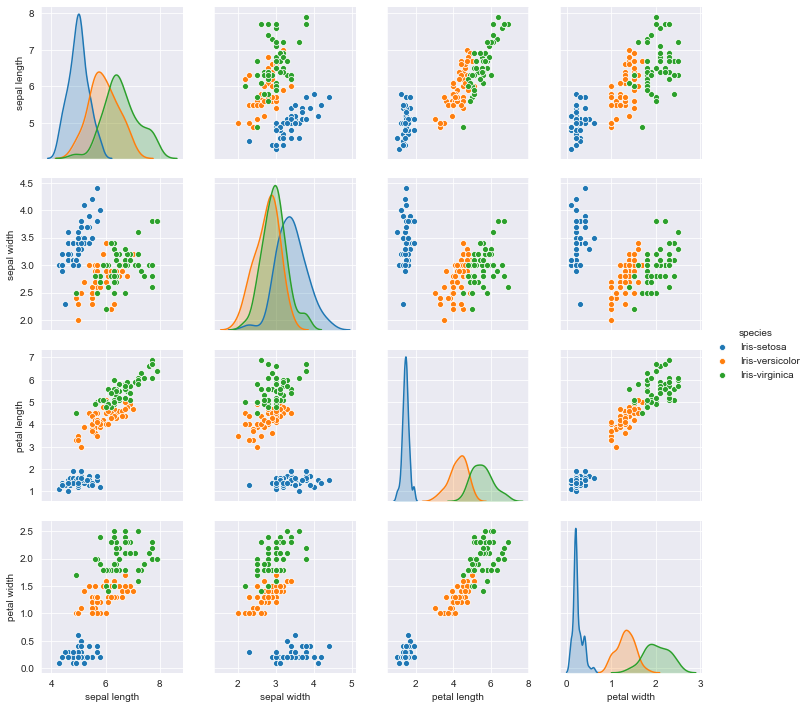

In [20]:
# Here, one of my very favorite visualizations... save that one.
# Sns pairplot provides a matrix with scatters on the triangles, and the distribution on the diagonal
sns.pairplot(data, hue = 'species') # , hue='species'

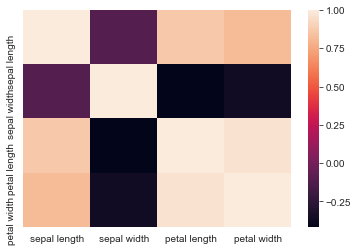

In [19]:
# And lastly, a correlation plot
sns.heatmap(data.corr())

### Preprocessing

In [22]:
# Transfer the (categorical) outcome of interest to the index (PCA only works with numerical data)
data.set_index('species', inplace=True)

KeyError: "None of ['species'] are in the columns"

In [24]:
# Let's standard-scale our data. For hver feature/variabel trækkes gennemsnittet fra og divideres med standardafvigelsen. Hermed normaliseres skalaerne for variablene, således at variable med stor spedning ikke dominerer analysen
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [25]:
# What are mean and Sd now? <- Nu samme gsn og std
pd.DataFrame(data_scaled, columns=data.columns).describe()

,sepal length,sepal width,petal length,petal width
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,0.000,0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.439,-1.569,-1.444
25%,-0.901,-0.588,-1.228,-1.182
50%,-0.053,-0.125,0.336,0.133
75%,0.675,0.569,0.763,0.791
max,2.492,3.115,1.786,1.711


In [26]:
# Instantiate a PCA object
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [27]:
# Fitr the model
model.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
# Fit and transform the data
data_reduced = model.transform(data_scaled)

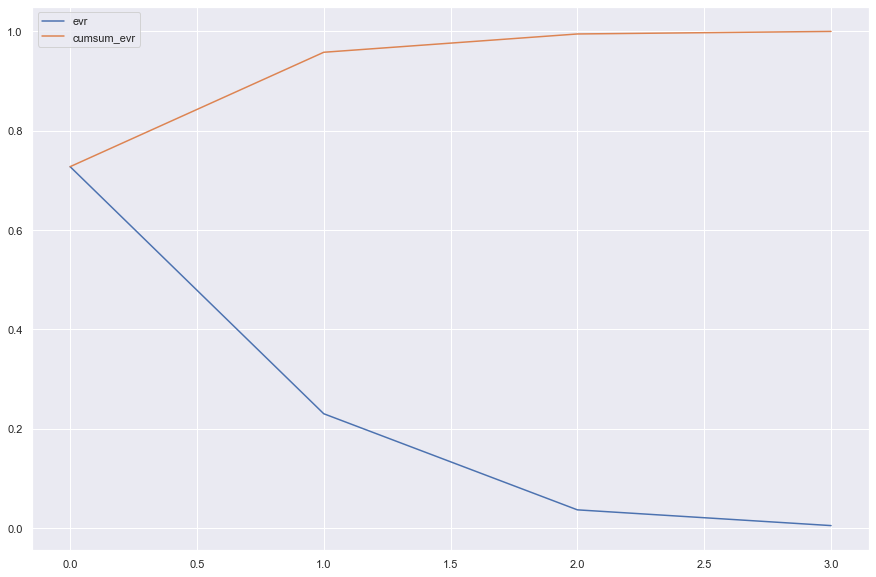

In [29]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

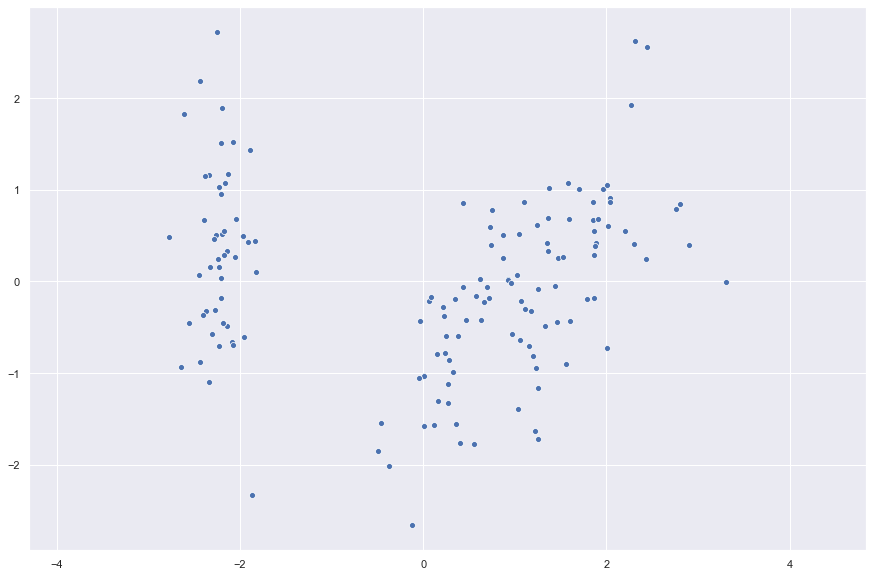

In [30]:
# Scatter plot of the first 2 componentws
sns.scatterplot(x = data_reduced[:,0], y = data_reduced[:,1])
plt.axis('equal')
plt.show()

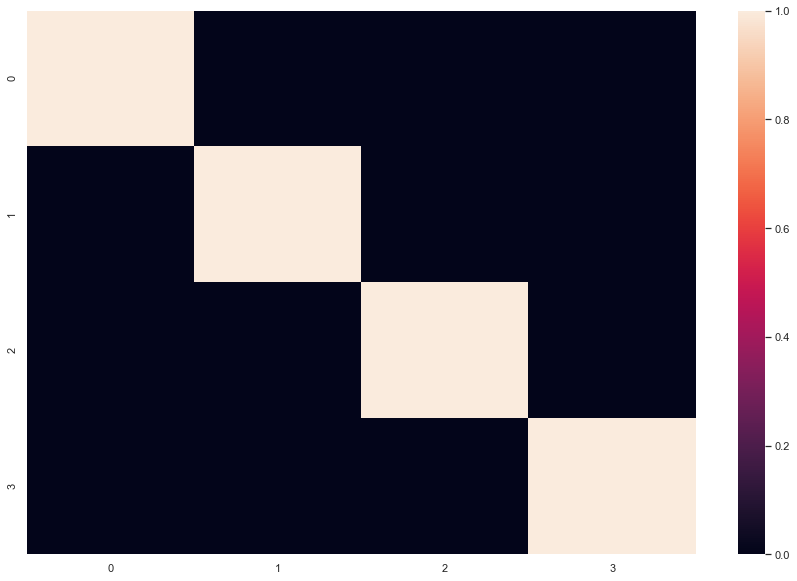

In [31]:
# Correlation of the components
sns.heatmap(pd.DataFrame(data_reduced).corr())

In [32]:
# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]
second_pc = model.components_[1,:]

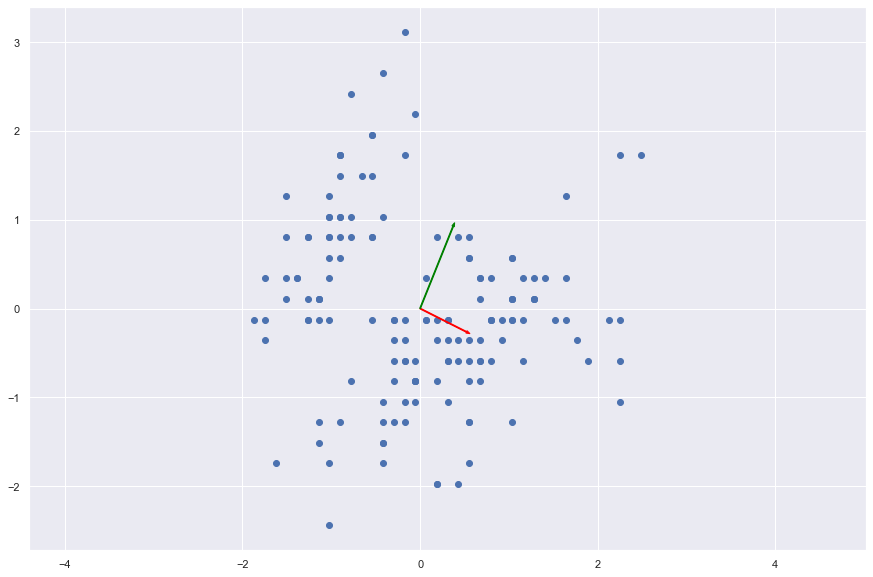

In [33]:
# Make a scatter plot of the untransformed points
plt.scatter(data_scaled[:,0], data_scaled[:,1])

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

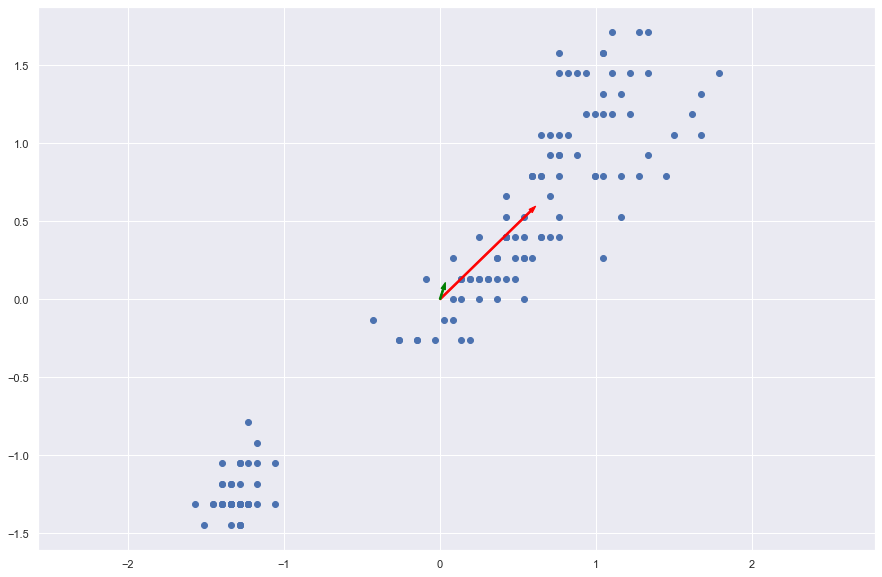

In [34]:
# Make a scatter plot of the untransformed points
plt.scatter(data_scaled[:,2], data_scaled[:,3])

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[2], first_pc[3], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[2], second_pc[3], color='green', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [35]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=data.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

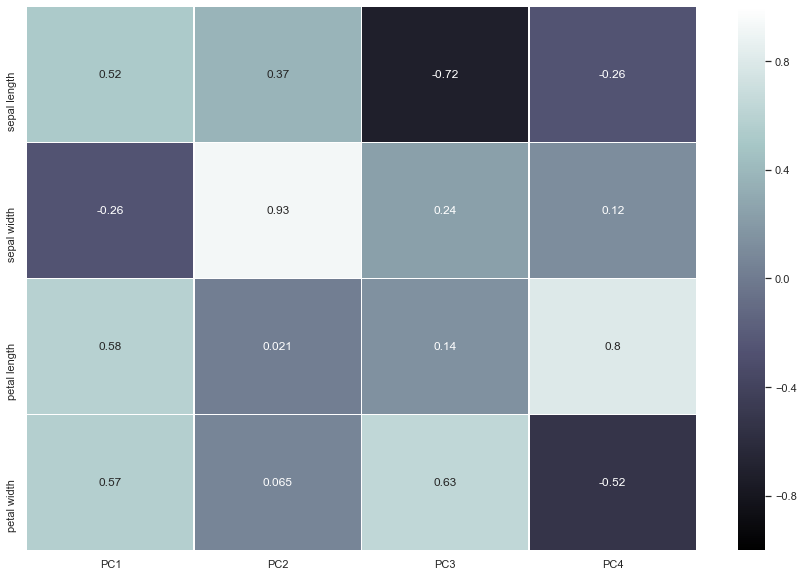

In [36]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

### Eksempel: The nomad list

In [40]:
# We open the data directly from Github
cities = pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/nomad_cities.csv', sep='\t')
# sep='\t' angiver den er tabulatorsepareret

In [38]:
# Data structures
cities.info

<bound method DataFrame.info of      Unnamed: 0  coffee_in_cafe  cost_beer  cost_coworking  cost_expat  \
0             0           1.730      1.730         152.410        1273   
1             1           0.850      0.850          98.880         780   
2             2           1.990      1.990         159.130        1653   
3             3           1.880      1.880          47.010        1640   
4             4           5.000      5.000         200.000        3309   
..          ...             ...        ...             ...         ...   
776         776           4.000      4.000          28.580         332   
777         777           2.000      2.000         183.000        1453   
778         778           1.600      1.600          32.010         760   
779         779           5.000      5.000         360.000        1441   
780         780           0.000      0.000         182.690        3749   

     cost_nomad  female_friendly       fragile_states_index  \
0          1364 

In [39]:
cities.head()

,Unnamed: 0,coffee_in_cafe,cost_beer,cost_coworking,cost_expat,cost_nomad,female_friendly,fragile_states_index,free_wifi_available,freedom_score,...,nightlife,nomadScore,nomad_score,peace_score,place,places_to_work,press_freedom_index,racism,safety,weed
0,0,1.730,1.730,152.410,1273,1364,1.000,52.7,0.400,0.6,...,1.000,1.000,1.000,0.8,Budapest,1.000,28.17,0.400,0.600,0
1,1,0.850,0.850,98.880,780,777,0.800,78.8,0.600,0.2,...,0.400,0.950,0.950,0.4,Chiang Mai,0.800,44.53,0.400,0.800,0
2,2,1.990,1.990,159.130,1653,1639,1.000,40.8,0.600,0.8,...,1.000,0.940,0.940,0.8,Prague,1.000,16.66,0.420,0.800,1
3,3,1.880,1.880,47.010,1640,1545,1.000,DotMap(__next__=DotMap()),1.000,0.6,...,0.600,0.940,0.940,DotMap(__next__=DotMap()),Taipei,1.000,24.37,0.000,1.000,0
4,4,5.000,5.000,200.000,3309,3028,0.800,34,0.600,0.6,...,1.000,0.940,0.940,0.8,Austin,1.000,22.49,0.800,0.730,0


In [41]:
cities.describe()

,Unnamed: 0,coffee_in_cafe,cost_beer,cost_coworking,cost_expat,cost_nomad,female_friendly,free_wifi_available,friendly_to_foreigners,internet_speed,...,lgbt_friendly,life_score,longitude,nightlife,nomadScore,nomad_score,places_to_work,racism,safety,weed
count,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,...,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000
mean,390.000,3.296,3.296,210.360,1880.431,2332.348,0.645,0.561,0.737,13.589,...,0.545,0.700,14.851,0.605,0.649,0.649,0.571,23280176929344430622638080.000,0.678,0.117
std,225.600,1.982,1.982,173.979,1265.411,1117.532,0.247,0.240,0.184,18.199,...,0.244,0.148,77.089,0.234,0.135,0.135,0.220,650596606331366367658246144.000,0.210,0.321
min,0.000,0.000,0.000,0.010,296.000,387.000,0.000,0.000,0.000,0.000,...,0.180,0.010,-157.858,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,195.000,1.600,1.600,88.960,1010.000,1486.000,0.440,0.400,0.600,2.000,...,0.400,0.620,-63.000,0.400,0.550,0.550,0.400,0.400,0.600,0.000
50%,390.000,3.030,3.030,172.050,1646.000,2209.000,0.600,0.600,0.800,6.000,...,0.600,0.720,14.791,0.600,0.680,0.680,0.400,0.600,0.600,0.000
75%,585.000,4.620,4.620,277.350,2408.000,3056.000,0.800,0.800,0.800,19.000,...,0.800,0.810,77.595,0.800,0.740,0.740,0.800,0.800,0.800,0.000
max,780.000,13.720,13.720,1524.460,13406.000,10121.000,1.000,1.000,1.000,197.000,...,1.000,1.000,174.776,1.000,1.000,1.000,1.000,18181818181818001939777978368.000,1.000,1.000


In [ ]:
#Load and instantiate the reversegeocoder
!pip install rgeocoder
from rgeocoder import ReverseGeocoder
rg = ReverseGeocoder()

In [ ]:
# That's how it works. nearest giver den nærmeste by
location = rg.nearest(56.457, 10.039) #lat, lon

In [ ]:
# Let's see what we get
print(location.name)
print(location.admin1)
print(location.admin2)
print(location.cc)

In [ ]:
# A smart way to get all geocoding done in one line
cities['countrycode'] = cities.apply(lambda t: rg.nearest(t['latitude'],t['longitude']).cc, axis=1)

In [ ]:
cities.info()

In [ ]:
# Download a recent country info table
c = pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/countrylist.csv')

In [ ]:
c.head()

In [ ]:
 # Merge this lookup table with our initial cities list
cities = cities.merge(c, left_on='countrycode', right_on='alpha_2')

In [1]:
# Let's select interesting variables for the analysis
vars_analysis = ["cost_nomad", "cost_coworking", "cost_expat", "coffee_in_cafe", "cost_beer", # costs
          "places_to_work", "free_wifi_available", "internet_speed", # work
          "freedom_score", "peace_score", "safety", "fragile_states_index", "press_freedom_index", # safety & freedom
          "female_friendly", "lgbt_friendly", "friendly_to_foreigners", "racism", # friendly
          "leisure","life_score","nightlife","weed"] # fun 

vars_descr = ["nomad_score", "cost_nomad", "places_to_work", "freedom_score", "friendly_to_foreigners", "life_score"]

In [2]:
# And use the selection to only extract these variables into a new object
data = cities[vars_analysis]
descr = cities[vars_descr]

NameError: name 'cities' is not defined

In [ ]:
# Quick check
data.info()

In [ ]:
print(data['peace_score'].unique())

In [ ]:
print(data['freedom_score'].unique())

In [ ]:
print(data['fragile_states_index'].unique())

In [ ]:
print(data['press_freedom_index'].unique())

In [ ]:
# This function will fo exactly that
def floater(x):
  try: #Try to
    return float(x) #Turn X into a floating point number
  except ValueError: #In case a ValueError occurs
    return np.nan #Turn X into np.nan (missing value placeholder)

In [ ]:
# map applies the defined function to every observation
data.loc[:,'peace_score'] = data['peace_score'].map(floater)
data.loc[:,'freedom_score'] = data['freedom_score'].map(floater)
data.loc[:,'fragile_states_index'] = data['fragile_states_index'].map(floater)
data.loc[:,'press_freedom_index'] = data['press_freedom_index'].map(floater)

In [ ]:
# yup, some missing data...
data.isnull().sum()

In [ ]:
# Import the imputation package
from fancyimpute import SoftImpute, SimpleFill

In [ ]:
# Easy version: Just replace missing values by the mean of the column
data_imp = SimpleFill(fill_method='mean').fit_transform(data)

In [ ]:
# We can have a quick look
pd.DataFrame(data_imp, columns=data.columns).head()

In [ ]:
# Or, we go crazy and use a neural network powered method
data_imp = SoftImpute().fit_transform(data)

In [ ]:
# Let's standard-scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_imp)

In [ ]:
pd.DataFrame(data_scaled, columns=data.columns).describe()

### Executing the PCA

In [ ]:
# Import the module and instantiate a PCA object
from sklearn.decomposition import PCA
model = PCA(n_components=7) #We pick 7 as the number of components...just because (it's a 3rd of the columns available)

# Fit and transform the data
data_reduced = model.fit_transform(data_scaled)

In [ ]:
# Make sure the data shape is as it should be
data_reduced.shape

In [ ]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()

In [ ]:
# Is 7 components really a good choice? 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [ ]:
# How mach "information" do we kick out? Den akkumulerede forklarede varians
model.explained_variance_ratio_.sum()

In [ ]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=data.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

In [ ]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

In [ ]:
# Now we can plot in our points
plt.figure(figsize=(12,12))
g = sns.scatterplot(data_reduced[:,0], data_reduced[:,1],
                    legend='full', palette='viridis')

legend = g.get_legend()

In [ ]:
import altair as alt

In [ ]:
# Define the data that we are going to use as a dataframe
d = pd.DataFrame({'y': data_reduced[:,1],
                 'x': data_reduced[:,0], 
                 'place': cities.place, 
                 'country': cities['alpha_2'],
                 'region': cities['region']})

In [ ]:
# Farvegrupperer på kontinent, laver det interaktivt, så man ved at føre curseren over får et tooltip med sted, land, region 

alt.Chart(d).mark_point().encode(
    x='x',
    y='y',
    color='region',
    tooltip=['place', 'country', 'region']
).interactive()

In [3]:
# Lastly, lets summarize the characteristics of the data by the different coordinates of component 1 and 2, in 4 categories.

In [ ]:
data['quadrant'] = 0

In [ ]:
q1 = data[(d['x'] < 0) & (d['y'] < 0)].index
q2 = data[(d['x'] < 0) & (d['y'] >= 0)].index
q3 = data[(d['x'] >= 0) & (d['y'] < 0)].index
q4 = data[(d['x'] >= 0) & (d['y'] >= 0)].index

In [ ]:
data['quadrant'][q1] = 1
data['quadrant'][q2] = 2
data['quadrant'][q3] = 3
data['quadrant'][q4] = 4

In [ ]:
data.groupby(['quadrant']).mean()